<a href="https://colab.research.google.com/github/mushroom3969/PyTorch_Class/blob/main/01_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch WorkFlow

In [1]:
work_flow_cover = {1 : "data (prepare and load)",
                    2 : "build model",
                    3 : "fitting tje model to data(training)",
                    4 : "making predictions and evaluating a model (inderence)",
                    5 : "saving and loading a model",
                    6 : "putting it all together"}

work_flow_cover

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting tje model to data(training)',
 4: 'making predictions and evaluating a model (inderence)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural network
import matplotlib.pyplot as plt

#Check Pytorch version
torch.__version__

'2.1.0+cu121'

## 1.Data (preparing and loading)

Data can be almost everything... in machine learning.

* Excel spreadsheet
* Image
* Video
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a modek to learn pattern in that numerical representation

In [9]:
# Create *known* parameters

weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end , step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and testing data

In [12]:
# Create train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [17]:
def plot_prediction(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_label, c="b", s=4, label = "Training Data")

  plt.scatter(test_data, test_label, c="g", s=4, label = "Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

  plt.legend(prop={"size":14});

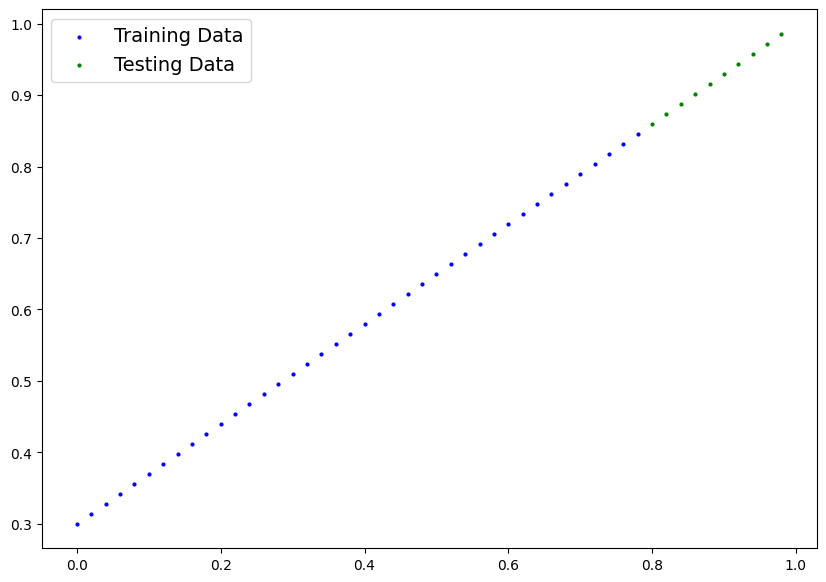

In [18]:
plot_prediction();

## 2. Build Pytorch Model

Through two algorithms find parametors:
1. Gradient descent
2. Backpropogation

In [19]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inheriant form nn.Module
  def __init__(self):
    super().__init__()

    #Initial Model parametors
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  #Forward define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias




### Pytorch model building essentials

* torch.nn - contains all of the building for computationsl graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters shoud ors model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite **forward()**
* torch.optim - this where the optimization in Pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclass require you to overwrite forward(), this method define what happen in the forwar computation

### Checking the contents of our Pytorch model


In [23]:
# Create random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parametor
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [24]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

In [30]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

Using `inference_mode()` or others, pytorch will set the model **didn't track the gradient**, so it will make pragram faster.

In [31]:
# Make prediction with model

with torch.inference_mode():
  y_preds = model_0(X_test)

# Do sth similar with torch.no_grad, however, torch.inference_mode() is prefer
with torch.no_grad():
  ypreds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [28]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

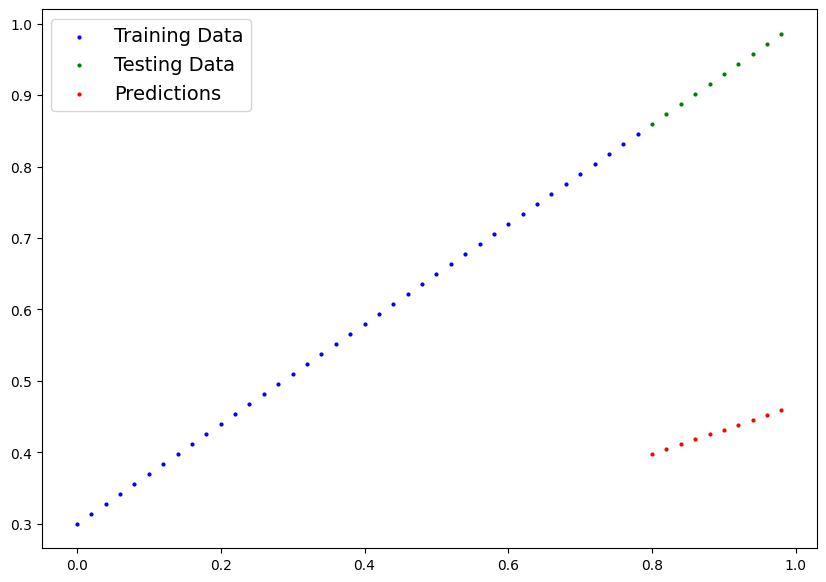

In [29]:
plot_prediction(predictions=y_preds)

### 3. Training Model

* Note: Loss function may also be called cost function or criterion in different area.

Things need to train:
* Loss Function
* Optimization

Specificially for PyTorch:
* A training loop
* A testing loop

In [33]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building a training loop (and a testing loop) in PyTorch

Things we need to do in a training loop:
0. loop through data
1. Forward pass (this involves data moving from input layer to ouput layer in our model's `forward()` functions) to make prediciton on data - also be called forward propogation
2. Calculate th loss
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gradient of each the parameters of our model with respect to loss (**backpropogation**)
5. Optimizer step - use the optimizer to adjust out model's parameters to try and improve the loss(**gradient descent**)

In [55]:
epochs = 100 # (hyperparameters)

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training (We can code this as function)
# 0. Loop through data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in pytorch sets all parametors that require gradient to gradient

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate Loss
  loss = loss_fn(y_pred, y_train)
  #print(f"loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform Backpropogation ob the loss with respect to the parameters of the model
  loss.backward()

  # 5. Perform gradient descent
  optimizer.step() # By default how the optimizer changes will acumulate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop

  ### Testing (Testing loop can seperate with trraining loop)
  model_0.eval() # turn off different setting in the model not needed for evaluation/testing (dropout/batch norm layer)
  with torch.inference_mode(): # trun off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


  # Print out model state_dict()
  #print(model_0.state_dict())

Epoch: 0 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
Epoch: 10 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
Epoch: 20 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
Epoch: 30 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
Epoch: 40 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
Epoch: 50 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
Epoch: 60 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
Epoch: 70 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
Epoch: 80 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
Epoch: 90 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112


In [51]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

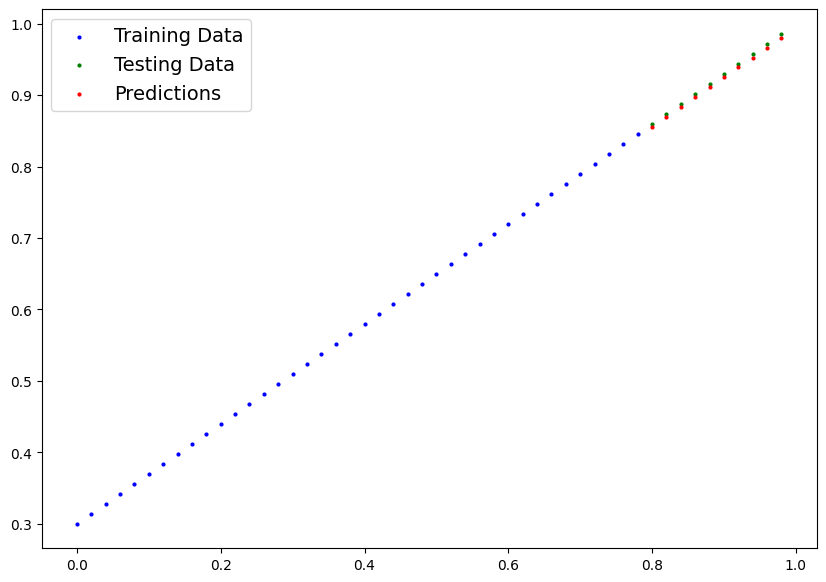

In [52]:
plot_prediction(predictions=y_pred_new)

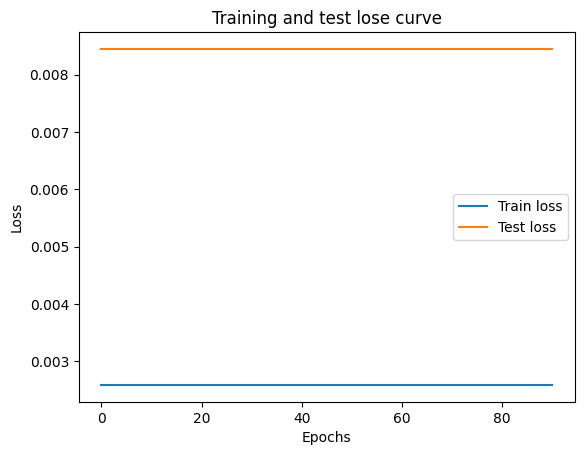

In [57]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label= "Train loss")
plt.plot(epoch_count, test_loss_values, label= "Test loss")
plt.title("Training and test lose curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving a model in PyTorch

There are three main method you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [59]:
# Saving our PyTorch model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model_0.pth


In [60]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Mar  3 09:15 01_pytorch_workflow_model_0.pth


## Loading a pytorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the save `state_dict()` into that

In [61]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [64]:
# To load in a saved state_dict we have to instance a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [67]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_pred = loaded_model_0(X_test)

loaded_model_pred

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])